In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)
%load_ext tensorboard
!rm -rf ./logs/

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to tmp/rock_paper_scissors/3.0.0.incompleteH277DE/rock_paper_scissors-train.tfrecord


Shuffling and writing examples to tmp/rock_paper_scissors/3.0.0.incompleteH277DE/rock_paper_scissors-test.tfrecord


Dataset rock_paper_scissors downloaded and prepared to tmp/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


현재 데이터셋으로부터 다운 받은 데이터를 출력해서 확인해 본다.

In [4]:
print('Raw train dataset:', dataset_train_raw)
print('Raw train dataset size:', len(list(dataset_train_raw)), '\n')

print('Raw test dataset:', dataset_test_raw)
print('Raw test dataset size:', len(list(dataset_test_raw)), '\n')

Raw train dataset: <DatasetV1Adapter shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw train dataset size: 2520 

Raw test dataset: <DatasetV1Adapter shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw test dataset size: 372 



In [5]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

이 데이터셋은 test와 train으로 나누어져 있으며, 따라서 여기에서 image와 label을 구분하여져 있다는 것만 확인하면 된다.

In [6]:
label_name = dataset_info.features['label'].int2str
print(label_name(0))

rock


주어진 자료를 시각화를 통해 미리 살펴본다.

In [7]:
def preview_dataset(dataset):
    plt.figure(figsize=(10, 10))
    plot_index = 0
    for features in dataset.take(12):  #전체중에 12개 선택
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        plt.axis('off')
        label = label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

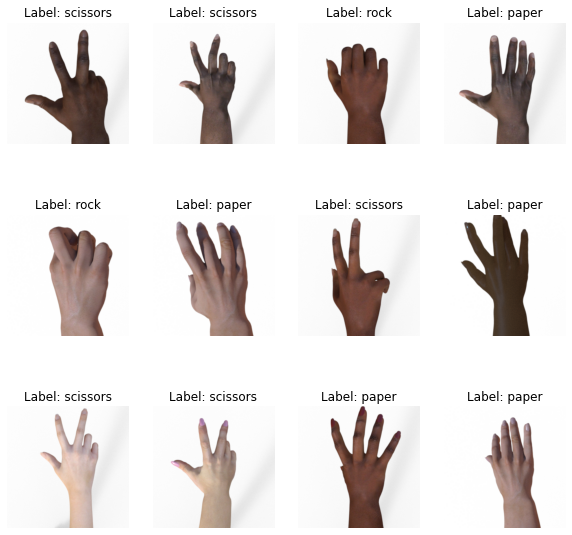

In [8]:
preview_dataset(dataset_train_raw)

데이터 전처리 과정이다

우선 픽셀값을 float꼴로 바꿔주고 255로 나누어서 원-핫 인코딩 진행

dataset_train_raw는 image와 label의 정보가 모두 담겨 있으며, keras.fit은 dictionary형태가 아닌 문자열의 형태를 인식(map으로 묶여 있는)하기 때문에 묶어 주어야 한다.

In [9]:
def format_example(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [150, 150])
    return image, label
  
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

(first_image, first_lable) = list(dataset_train.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (150, 150, 3) 

[[[0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9813726  0.9813726  0.9813726 ]]

 ...

 [[0.9862745  0.9862745  0.9862745 ]
  [0.98725486 0.98725486 0.98725486]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.9705882  0.9705882  0.9705882 ]
  [0.97352946 0.97352946 0.97352946]
  [0.9754902  0.9754902  0.9754902 ]]

 [[0.9882353  0.9882353  0.9882353

In [10]:
dataset_train = dataset_train.shuffle(buffer_size=2520)
dataset_train = dataset_train.batch(32)
dataset_test = dataset_test.batch(32)

In [11]:
model = tf.keras.Sequential([
           tf.keras.layers.Conv2D(input_shape = (150,150,3),kernel_size = (3,3), filters = 16,activation = 'relu'),
           tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 32,activation = 'relu'),
           tf.keras.layers.MaxPool2D(pool_size =(3,3)),
           tf.keras.layers.Dropout(rate = 0.5),
           tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu'),
           tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 128,activation = 'relu'),
           tf.keras.layers.MaxPool2D(pool_size = (2,2)),
           tf.keras.layers.Dropout(rate = 0.5),
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(units = 128, activation = 'relu'),
           tf.keras.layers.Dropout(rate = 0.5),
           tf.keras.layers.Dense(units = 3, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0

In [12]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
training_history = model.fit(
    x=dataset_train,
    validation_data=dataset_test,
    epochs=100,
)

Epoch 1/100
79/79 [==============================] - 4s 48ms/step - loss: 1.0267 - accuracy: 0.5687 - val_loss: 0.5796 - val_accuracy: 0.7742
Epoch 2/100
79/79 [==============================] - 3s 44ms/step - loss: 0.1657 - accuracy: 0.9524 - val_loss: 0.3101 - val_accuracy: 0.8844
Epoch 3/100
79/79 [==============================] - 3s 43ms/step - loss: 0.0472 - accuracy: 0.9841 - val_loss: 0.3371 - val_accuracy: 0.8844
Epoch 4/100
79/79 [==============================] - 3s 44ms/step - loss: 0.0278 - accuracy: 0.9921 - val_loss: 0.3535 - val_accuracy: 0.8790
Epoch 5/100
79/79 [==============================] - 3s 44ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.2364 - val_accuracy: 0.9274
Epoch 6/100
79/79 [==============================] - 3s 44ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.3136 - val_accuracy: 0.8952
Epoch 7/100
79/79 [==============================] - 3s 44ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.4523 - val_accuracy: 0.9113
Epoch 

In [14]:
model.evaluate(dataset_test)

12/12 [==============================] - 1s 65ms/step - loss: 1.1648 - accuracy: 0.7984


[1.1647741794586182, 0.7983871102333069]

Accuracy = 79.84%

이렇게 정확도가 나오기는 했으나 keras.fit의 과정에서 callback에 저장할 값을 정의해서 early_stopping_callback을 설정해주거나
훈련과 학습 데이터를 만드는 과정에서 data augmentation을 해 주었다면 훨씬 더 정확도가 높게 나왔을 것으로 생각이 된다.